<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/%EB%AA%A8%EB%8D%B8%EC%8B%A4%EC%8A%B5_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 해당 옵션을 사용하지 않으면 한글 깨짐..
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,267 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and di

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='Apple Gothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

In [ ]:
# 혼동행렬 출력용 함수

def make_cm(matrix, columns):
    # matrix : 넘파이 배열
    # columns : 필드명 리스트
    n = len(columns)

    # '정답 데이터'를 n번 반복해 연접한 리스트
    act = ['정답데이터'] * n
    pred = ['예측결과'] * n

    # 데이터프레임 생성
    cm = pd.DataFrame(matrix,
        columns=[pred, columns], index=[act, columns])
    return cm

In [ ]:
# 데이터 집합을 내려받아 압축 해제
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip -O bank.zip | tail -n 1
!unzip -o bank.zip | tail -n 1

# 역주: 위 명령에서 오류가 날 경우 URL의 파일을 직접 내려받아 notebooks 디렉토리에
# 압축을 해제하면 정상 진행할 수 있습니다.

# bank-full.csv 파일을 데이터프레임으로 읽어 들이기
df_all = pd.read_csv('bank-full.csv', sep=';')

# 우리말 필드명을 정의
columns = [
    '연령', '직업', '혼인_여부', '학력', '채무불이행', '평균잔고',
    '주택대출', '신용대출', '연락수단', '마지막통화일',
    '마지막통화월', '마지막통화시간', '통화횟수_캠페인중',
    '마지막영업후_경과일수', '통화횟수_캠페인전', '지난영업_결과',
    '이번영업_결과'
]
df_all.columns = columns

--2023-07-13 06:04:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank.zip’

bank.zip                [  <=>               ] 565.47K  2.30MB/s    in 0.2s    

2023-07-13 06:04:31 (2.30 MB/s) - ‘bank.zip’ saved [579043]

  inflating: bank.csv                


In [ ]:
# 데이터프레임 내용 확인
display(df_all.head())

,연령,직업,혼인_여부,학력,채무불이행,평균잔고,주택대출,신용대출,연락수단,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,지난영업_결과,이번영업_결과
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# 데이터 건수와 필드 수 확인
print(df_all.shape)
print()

# '이번영업_결과' 필드의 값 분포 확인
print(df_all['이번영업_결과'].value_counts())
print()

# 영업 성공률
rate = df_all['이번영업_결과'].value_counts()['yes']/len(df_all)
print(f'영업 성공률: {rate:.4f}')

(45211, 17)

no     39922
yes     5289
Name: 이번영업_결과, dtype: int64

영업 성공률: 0.1170


In [ ]:
# 누락값 확인
print(df_all.isnull().sum())

연령             0
직업             0
혼인_여부          0
학력             0
채무불이행          0
평균잔고           0
주택대출           0
신용대출           0
연락수단           0
마지막통화일         0
마지막통화월         0
마지막통화시간        0
통화횟수_캠페인중      0
마지막영업후_경과일수    0
통화횟수_캠페인전      0
지난영업_결과        0
이번영업_결과        0
dtype: int64


In [ ]:
# 전처리 1
# get_dummies 함수를 사용해 범주 값에 원-핫 인코딩 적용

# 필드에 원-핫 인코딩을 적용하는 함수
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column],axis=1),df_dummy],axis=1)
    return df

df_all2 = df_all.copy()
df_all2 = enc(df_all2, '직업')
df_all2 = enc(df_all2, '혼인_여부')
df_all2 = enc(df_all2, '학력')
df_all2 = enc(df_all2, '연락수단')
df_all2 = enc(df_all2, '지난영업_결과')

# 결과 확인
display(df_all2.head())

,연령,채무불이행,평균잔고,주택대출,신용대출,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,이번영업_결과,직업_admin.,직업_blue-collar,직업_entrepreneur,직업_housemaid,직업_management,직업_retired,직업_self-employed,직업_services,직업_student,직업_technician,직업_unemployed,직업_unknown,혼인_여부_divorced,혼인_여부_married,혼인_여부_single,학력_primary,학력_secondary,학력_tertiary,학력_unknown,연락수단_cellular,연락수단_telephone,연락수단_unknown,지난영업_결과_failure,지난영업_결과_other,지난영업_결과_success,지난영업_결과_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
# 전처리 2
# yes/no를 1과 0으로 변환

# 이진 레이블값(yes/no)를 정수(1/0)으로 변환하는 함수
def enc_bin(df, column):
    df[column] = df[column].map(dict(yes=1, no=0))
    return df

df_all2 = enc_bin(df_all2, '채무불이행')
df_all2 = enc_bin(df_all2, '주택대출')
df_all2 = enc_bin(df_all2, '신용대출')
df_all2 = enc_bin(df_all2, '이번영업_결과')

# 결과 확인
display(df_all2.head())

,연령,채무불이행,평균잔고,주택대출,신용대출,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,이번영업_결과,직업_admin.,직업_blue-collar,직업_entrepreneur,직업_housemaid,직업_management,직업_retired,직업_self-employed,직업_services,직업_student,직업_technician,직업_unemployed,직업_unknown,혼인_여부_divorced,혼인_여부_married,혼인_여부_single,학력_primary,학력_secondary,학력_tertiary,학력_unknown,연락수단_cellular,연락수단_telephone,연락수단_unknown,지난영업_결과_failure,지난영업_결과_other,지난영업_결과_success,지난영업_결과_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
# 전처리 3
# 달 이름(jan, feb ..)을 숫자(1, 2 ..)로 변환

month_dict = dict(jan=1, feb=2, mar=3, apr=4,
    may=5, jun=6, jul=7, aug=8, sep=9, oct=10,
    nov=11, dec=12)

def enc_month(df, column):
    df[column] = df[column].map(month_dict)
    return df

df_all2 = enc_month(df_all2, '마지막통화월')

# 결과 확인
display(df_all2.head())

,연령,채무불이행,평균잔고,주택대출,신용대출,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,이번영업_결과,직업_admin.,직업_blue-collar,직업_entrepreneur,직업_housemaid,직업_management,직업_retired,직업_self-employed,직업_services,직업_student,직업_technician,직업_unemployed,직업_unknown,혼인_여부_divorced,혼인_여부_married,혼인_여부_single,학력_primary,학력_secondary,학력_tertiary,학력_unknown,연락수단_cellular,연락수단_telephone,연락수단_unknown,지난영업_결과_failure,지난영업_결과_other,지난영업_결과_success,지난영업_결과_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
# 데이터 분할
# 입력 데이터와 정답 데이터를 나누기
x = df_all2.drop('이번영업_결과', axis=1)
y = df_all2['이번영업_결과'].values

# 학습 데이터와 검증 데이터를 나누기
# 학습 데이터 60%, 검증 데이터 40%의 비율이 되도록 분할
test_size = 0.4

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=test_size, random_state=random_seed,
  stratify=y)

In [ ]:
x_train

,연령,채무불이행,평균잔고,주택대출,신용대출,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,직업_admin.,직업_blue-collar,직업_entrepreneur,직업_housemaid,직업_management,직업_retired,직업_self-employed,직업_services,직업_student,직업_technician,직업_unemployed,직업_unknown,혼인_여부_divorced,혼인_여부_married,혼인_여부_single,학력_primary,학력_secondary,학력_tertiary,학력_unknown,연락수단_cellular,연락수단_telephone,연락수단_unknown,지난영업_결과_failure,지난영업_결과_other,지난영업_결과_success,지난영업_결과_unknown
4879,31,0,1343,1,1,21,5,85,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4008,55,0,0,0,0,16,5,409,3,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
13446,53,0,-626,1,0,9,7,205,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
7627,38,0,12855,1,0,30,5,417,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1895,35,0,300,1,0,9,5,338,4,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,33,0,697,0,0,6,2,860,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
41179,81,0,1,0,0,19,8,65,5,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
11045,43,0,236,0,0,17,6,169,4,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
7162,48,0,1910,1,0,29,5,413,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
x_test

,연령,채무불이행,평균잔고,주택대출,신용대출,마지막통화일,마지막통화월,마지막통화시간,통화횟수_캠페인중,마지막영업후_경과일수,통화횟수_캠페인전,직업_admin.,직업_blue-collar,직업_entrepreneur,직업_housemaid,직업_management,직업_retired,직업_self-employed,직업_services,직업_student,직업_technician,직업_unemployed,직업_unknown,혼인_여부_divorced,혼인_여부_married,혼인_여부_single,학력_primary,학력_secondary,학력_tertiary,학력_unknown,연락수단_cellular,연락수단_telephone,연락수단_unknown,지난영업_결과_failure,지난영업_결과_other,지난영업_결과_success,지난영업_결과_unknown
35548,39,0,1163,1,0,7,5,432,3,363,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
9437,37,0,160,0,0,6,6,107,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
23403,53,0,253,0,0,27,8,202,6,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
14973,59,0,220,1,0,16,7,30,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
24058,44,0,1679,0,0,20,10,718,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,32,0,159,1,1,14,5,46,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
35273,44,0,-57,1,0,7,5,234,1,356,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4297,47,0,1851,1,0,19,5,140,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
41730,66,0,0,0,0,8,10,189,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
# 알고리즘 선택

In [ ]:
# 후보 알고리즘 리스트 만들기

# 로지스틱 회귀 (4.3.3)
from sklearn.linear_model import LogisticRegression
algorithm1 = LogisticRegression(random_state=random_seed)

# 결정 트리 (4.3.6)
from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier(random_state=random_seed)

# 랜덤 포레스트 (4.3.7)
from sklearn.ensemble import RandomForestClassifier
algorithm3 = RandomForestClassifier(random_state=random_seed)

# XGBoost (4.3.8)
from xgboost import XGBClassifier
algorithm4 = XGBClassifier(random_state=random_seed)

algorithms = [algorithm1, algorithm2, algorithm3, algorithm4]

In [ ]:

# 교차검증법을 적용해 최적의 알고리즘을 선정한다
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    # 교차검증법 적용
    scores = cross_val_score(algorithm , x_train, y_train,
        cv=stratifiedkfold, scoring='roc_auc')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'평균 정확도: {score:.4f}  개별 정확도: {scores}  {name}')

평균 정확도: 0.8325  개별 정확도: [0.8276 0.8287 0.8412]  LogisticRegression
평균 정확도: 0.6958  개별 정확도: [0.6917 0.7023 0.6935]  DecisionTreeClassifier
평균 정확도: 0.9200  개별 정확도: [0.9259 0.9196 0.9145]  RandomForestClassifier
평균 정확도: 0.9256  개별 정확도: [0.9263 0.9272 0.9234]  XGBClassifier


In [ ]:
# 알고리즘 선택 (XGBoost)
algorithm = XGBClassifier(random_state=random_seed)

# 학습
algorithm.fit(x_train, y_train)

# 예측
y_pred = algorithm.predict(x_test)

In [ ]:
# 평가

# 혼동행렬 출력
from sklearn.metrics import confusion_matrix
df_matrix = make_cm(
    confusion_matrix(y_test, y_pred), ['실패', '성공'])
display(df_matrix)

# 정확률, 재현율, F-점수 계산하기
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary')
print(f'정밀도: {precision:.4f}  재현율: {recall:.4f}  F-점수: {fscore:.4f}')

예측결과      
             실패    성공
정답데이터 실패  15371   598
      성공   1102  1014

정밀도: 0.6290  재현율: 0.4792  F-점수: 0.5440


In [ ]:
# 튜닝하기

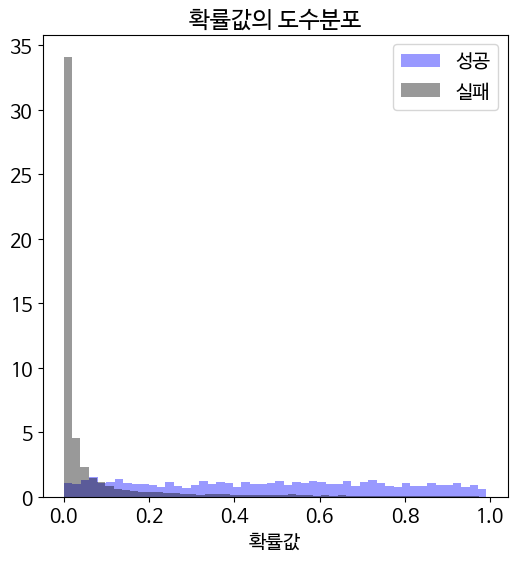

In [ ]:
# 확률값의 도수분포 그래프
import seaborn as sns

# y=0인 데이터의 확률값 구하기
y_proba0 = algorithm.predict_proba(x_test)[:,1]

# y_test=0과 y_test=1로 데이터를 분할
y0 = y_proba0[y_test==0]
y1 = y_proba0[y_test==1]

# 산포도 그리기
plt.figure(figsize=(6,6))
plt.title('확률값의 도수분포')
sns.distplot(y1, kde=False, norm_hist=True,
    bins=50, color='b', label='성공')
sns.distplot(y0, kde=False, norm_hist=True,
    bins=50, color='k', label='실패')
plt.xlabel('확률값')
plt.legend()
plt.show()

In [ ]:
# 설정한 역치 값에 대해 예측을 수행하는 함수
def pred(algorithm, x, thres):
    # 확률값 꺼내기 (행렬)
    y_proba = algorithm.predict_proba(x)

    # 예측결과 1의 함숫값
    y_proba1 =  y_proba[:,1]

    # 예측결과 1의 함숫값이 역치보다 큰가?
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

In [ ]:
# 역치를 0.05씩 감소시켜가며 정확률, 재현율, F-점수를 계산한다
thres_list = np.arange(0.5, 0, -0.05)

for thres in thres_list:
    y_pred = pred(algorithm, x_test, thres)
    pred_sum =  y_pred.sum()
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_test, y_pred, average='binary')
    print(f'역치: {thres:.2f} 양성 예측 수: {pred_sum}\
 정밀도: {precision:.4f} 재현율: {recall:.4f}  F-점수: {fscore:.4f})')

역치: 0.50 양성 예측 수: 1612 정밀도: 0.6290 재현율: 0.4792  F-점수: 0.5440)
역치: 0.45 양성 예측 수: 1839 정밀도: 0.6117 재현율: 0.5317  F-점수: 0.5689)
역치: 0.40 양성 예측 수: 2041 정밀도: 0.6022 재현율: 0.5808  F-점수: 0.5913)
역치: 0.35 양성 예측 수: 2304 정밀도: 0.5820 재현율: 0.6337  F-점수: 0.6068)
역치: 0.30 양성 예측 수: 2544 정밀도: 0.5688 재현율: 0.6838  F-점수: 0.6210)
역치: 0.25 양성 예측 수: 2831 정밀도: 0.5440 재현율: 0.7278  F-점수: 0.6226)
역치: 0.20 양성 예측 수: 3184 정밀도: 0.5135 재현율: 0.7727  F-점수: 0.6170)
역치: 0.15 양성 예측 수: 3616 정밀도: 0.4806 재현율: 0.8214  F-점수: 0.6064)
역치: 0.10 양성 예측 수: 4277 정밀도: 0.4361 재현율: 0.8814  F-점수: 0.5835)
역치: 0.05 양성 예측 수: 5519 정밀도: 0.3629 재현율: 0.9466  F-점수: 0.5247)


In [ ]:
# F-점수가 최대가 되는 역치는 0.25
y_final = pred(algorithm, x_test, 0.25)

# 혼동행렬을 출력
df_matrix2 = make_cm(
    confusion_matrix(y_test, y_final), ['실패', '성공'])
display(df_matrix2)

# 정확률, 재현율, F-점수를 계산
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_final, average='binary')
print(f'정밀도: {precision:.4f}  재현율: {recall:.4f}\
  F-점수: {fscore:.4f}')

예측결과      
             실패    성공
정답데이터 실패  14678  1291
      성공    576  1540

정밀도: 0.5440  재현율: 0.7278  F-점수: 0.6226


In [ ]:
# 결론적으로 영업 성공률: 0.1170인 데이터셋에서 다음 모델을 적용하여 마케팅을 할 경우 0.6226으로 약 6배가 높아지는 것을 알 수 있다.
# 해당 확률이 높은 고객부터 순차적으로 영업을 한다면 기존에 무작위로 영업을 하는 것보다 좋을것이고,
# 영업확률이 높은 고객에게는 더 영업을 잘하는 사원을 붙여서 전체적인 이익을 높이는 것도 방안일 것이다.

# -> 그러면 누가 영업을 잘하는지 추가적인 모델이 필요할 것
# 데이터 확보 및 분석 실시

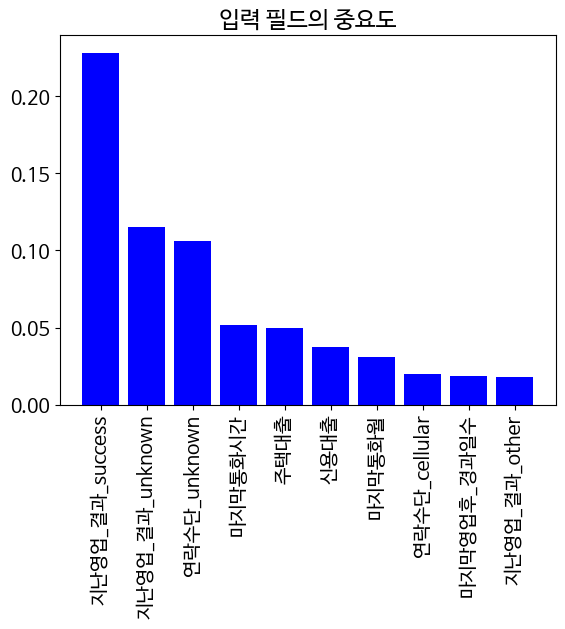

In [ ]:
# 중요도 분석

# 중요도 벡터 계산
importances = algorithm.feature_importances_

# 필드명을 키로 Series 객체를 생성
w = pd.Series(importances, index=x.columns)

# 내림차순으로 정렬
u = w.sort_values(ascending=False)

# 상위 1개 항목을 추출
v = u[:10]

# 중요도의 막대그래프를 출력
plt.title('입력 필드의 중요도')
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)), v.index, rotation=90)
plt.show()

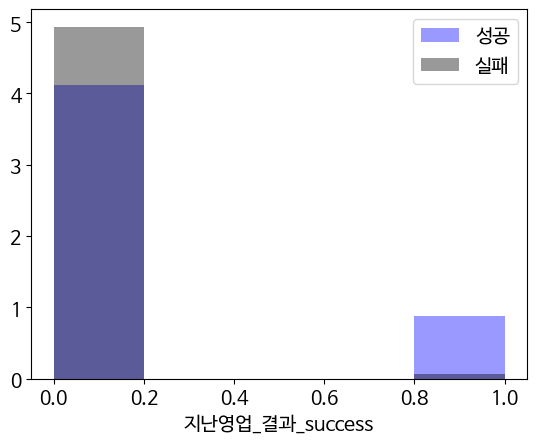

In [ ]:
column = '지난영업_결과_success'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='성공')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='실패')

plt.legend()
plt.show()

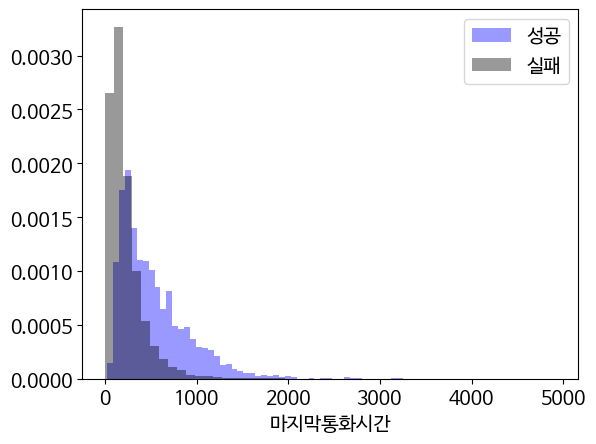

In [ ]:
column = '마지막통화시간'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
             bins=50, color='b', label='성공')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=50, color='k', label='실패')

plt.legend()
plt.show()

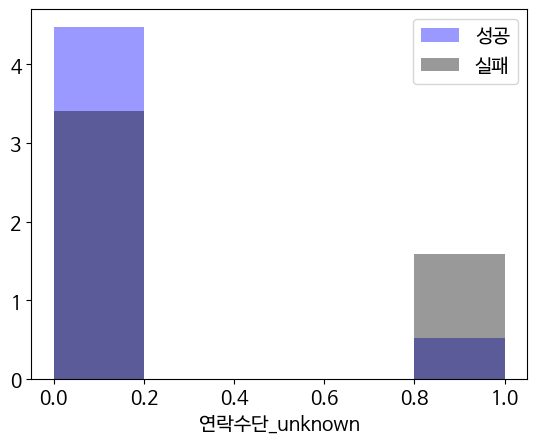

In [ ]:
column = '연락수단_unknown'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='성공')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='실패')

plt.legend()
plt.show()

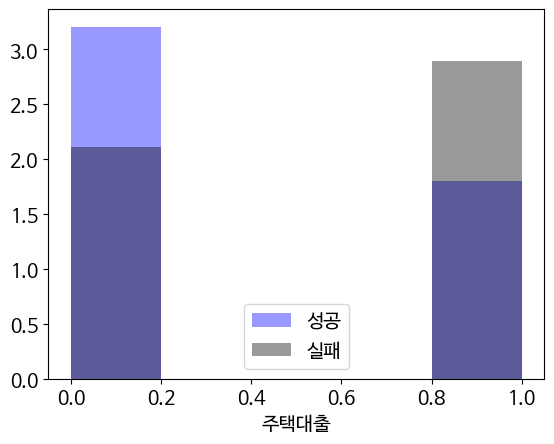

In [ ]:
column = '주택대출'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='성공')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='실패')

plt.legend()
plt.show()

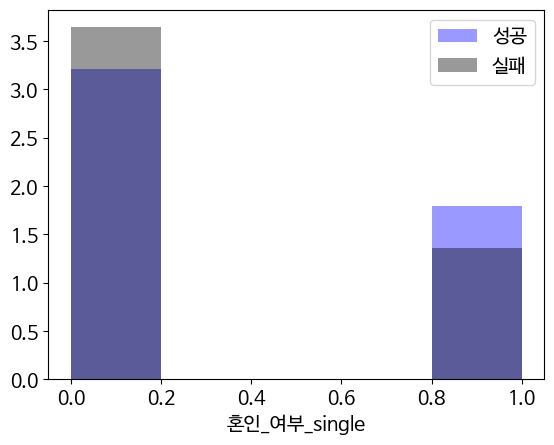

In [ ]:
column = '혼인_여부_single'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='성공')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='실패')

plt.legend()
plt.show()